In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df_sub2000 = df.loc[df["Year"] < 2000]
df_up2000 = df.loc[df["Year"] >= 2000]
df_sub2000 = df_sub2000.drop_duplicates(['Name', 'Year'])
df_up2000 = df_up2000.drop_duplicates(['Name', 'Year'])

# 1

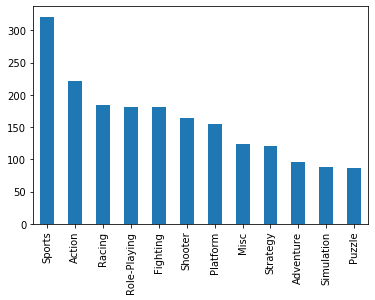

In [5]:
df_sub2000.Genre.value_counts().plot.bar()

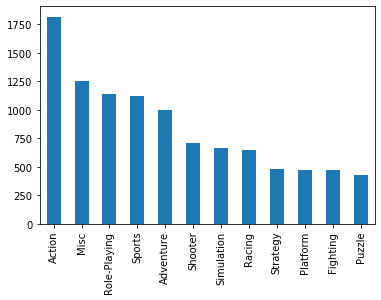

In [6]:
df_up2000.Genre.value_counts().plot.bar()

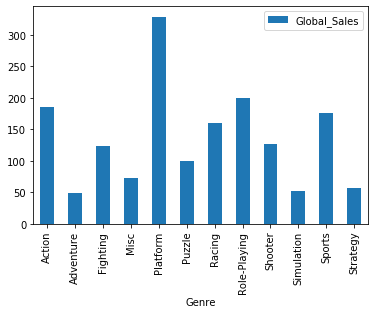

In [7]:
df_sub2000.groupby('Genre').agg({'Global_Sales':'sum'}).plot.bar()

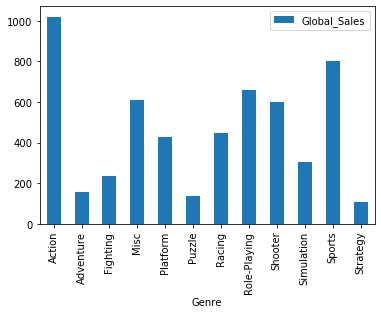

In [8]:
df_up2000.groupby('Genre').agg({'Global_Sales':'sum'}).plot.bar()

# 2

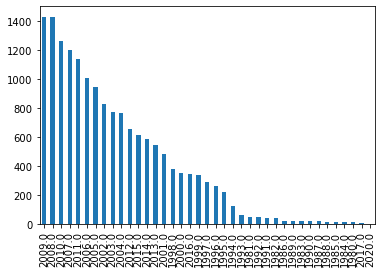

In [9]:
df.Year.value_counts().plot.bar()

# 3

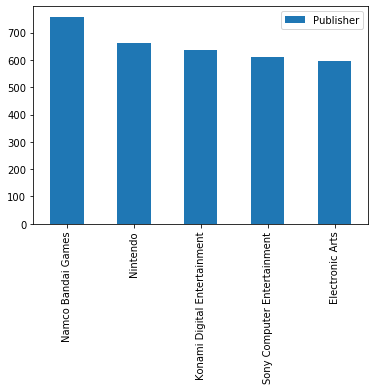

In [10]:
df_pubmany = df.drop_duplicates(['Name'])
# df_pubmany = df_pubmany['Platform']
df_pubmany = df_pubmany['Publisher']
df_pubmany = df_pubmany.value_counts().head(5)
df_pubmany.plot.bar(stacked=True, legend=True)
# df['Platform'].unique()

# 4

In [11]:
df["NA_EU_JP"] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,30.38
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01


In [12]:
df_b2 = df.loc[df["Year"] < 2000]
df_a2 = df.loc[df["Year"] >= 2000]

df_a2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,27.11
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,26.16
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01


In [13]:
df['Percent_NA'] = df['NA_Sales']/df['Global_Sales']*100
df['Percent_EU'] = df['EU_Sales']/df['Global_Sales']*100
df['Percent_JP'] = df['JP_Sales']/df['Global_Sales']*100
df['Percent_Other'] = df['Other_Sales']/df['Global_Sales']*100

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP,Percent_NA,Percent_EU,Percent_JP,Percent_Other
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28,50.145033,35.073725,4.556442,10.224801
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.47,72.266402,8.896620,16.923459,1.913519
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52,44.249023,35.957566,10.580681,9.240648
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04,47.727273,33.363636,9.939394,8.969697
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,30.38,35.926044,28.339178,32.578897,3.187759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,100.000000,0.000000,0.000000,0.000000
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,100.000000,0.000000,0.000000,0.000000
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,0.000000,0.000000,0.000000,0.000000
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,0.000000,100.000000,0.000000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B8B8AAA08>],
      dtype=object)

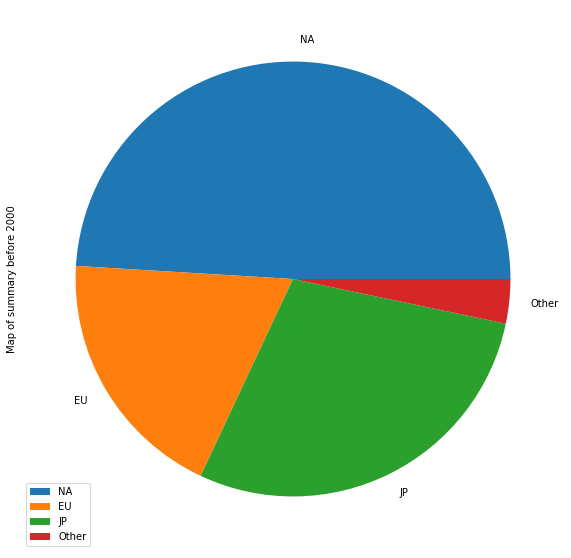

In [14]:
df3 = pd.DataFrame([df_b2['NA_Sales'].sum(), df_b2['EU_Sales'].sum(), df_b2['JP_Sales'].sum(), df_b2['Other_Sales'].sum()])

df3 = df3.rename({0:'NA', 1:'EU', 2:'JP', 3:'Other'})
df3 = df3.rename(columns={0:'Map of summary before 2000'})

df3.plot.pie(subplots=True, legend=True, figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B8A753108>],
      dtype=object)

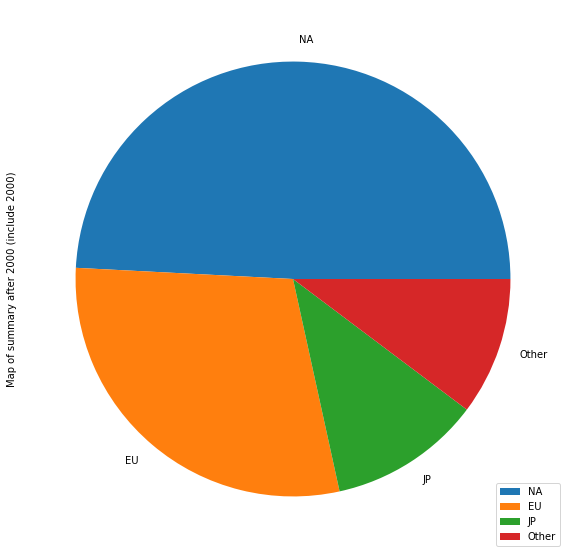

In [15]:
df4 = pd.DataFrame([df_a2['NA_Sales'].sum(), df_a2['EU_Sales'].sum(), df_a2['JP_Sales'].sum(), df_a2['Other_Sales'].sum()])

df4 = df4.rename({0:'NA', 1:'EU', 2:'JP', 3:'Other'})
df4 = df4.rename(columns={0:'Map of summary after 2000 (include 2000)'})

df4.plot.pie(subplots=True, legend=True, figsize=(10,10))